In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_victim_of_rape=pd.read_csv("C:\\Users\\HP\\Desktop\\DT\\dataset\\20_Victims_of_rape.csv")

In [4]:
# Looking at the shape of data
df_victim_of_rape.shape

(1050, 11)

In [5]:
# Let's see what are the AREAs, provided to us for exploration!
df_victim_of_rape.Area_Name.value_counts()

Rajasthan                    30
Himachal Pradesh             30
Odisha                       30
Andaman & Nicobar Islands    30
Gujarat                      30
Lakshadweep                  30
Haryana                      30
Jharkhand                    30
Maharashtra                  30
Andhra Pradesh               30
Goa                          30
Sikkim                       30
Mizoram                      30
Karnataka                    30
Kerala                       30
Manipur                      30
Nagaland                     30
Bihar                        30
Meghalaya                    30
West Bengal                  30
Uttarakhand                  30
Puducherry                   30
Dadra & Nagar Haveli         30
Punjab                       30
Tamil Nadu                   30
Jammu & Kashmir              30
Chandigarh                   30
Arunachal Pradesh            30
Madhya Pradesh               30
Delhi                        30
Daman & Diu                  30
Chhattis

In [6]:
df_victim_of_rape.groupby(['Year','Subgroup']).Rape_Cases_Reported.sum()

Year  Subgroup              
2001  Total Rape Victims        16075
      Victims of Incest Rape      439
      Victims of Other Rape     15636
2002  Total Rape Victims        16373
      Victims of Incest Rape      369
      Victims of Other Rape     16004
2003  Total Rape Victims        15847
      Victims of Incest Rape      399
      Victims of Other Rape     15448
2004  Total Rape Victims        18233
      Victims of Incest Rape      505
      Victims of Other Rape     17728
2005  Total Rape Victims        18359
      Victims of Incest Rape      750
      Victims of Other Rape     17609
2006  Total Rape Victims        19348
      Victims of Incest Rape      431
      Victims of Other Rape     18917
2007  Total Rape Victims        20737
      Victims of Incest Rape      405
      Victims of Other Rape     20332
2008  Total Rape Victims        21467
      Victims of Incest Rape      309
      Victims of Other Rape     21158
2009  Total Rape Victims        21397
      Victims of Ince

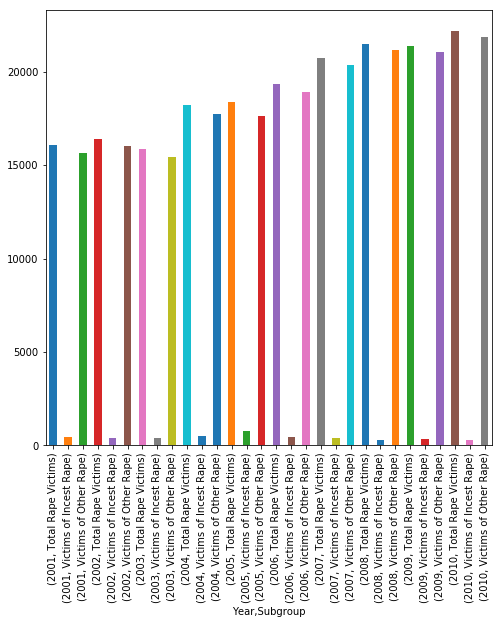

In [7]:
plt.figure(figsize=(8,8))
df_victim_of_rape.groupby(['Year','Subgroup']).Rape_Cases_Reported.sum().plot(kind='bar');
#We will look at each subgroup of rape over the years and will infer!

In [9]:
# One thing is clear that with time increase, the rapes performed are increasing! This is a very concerning look as with time, the people should be educated, maybe they are, and if they are, then it is more concerning as what type of education are they recieving!

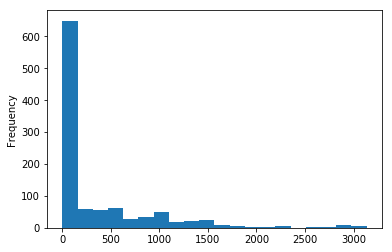

In [10]:
df_victim_of_rape.Rape_Cases_Reported.plot(kind='hist',bins=20);

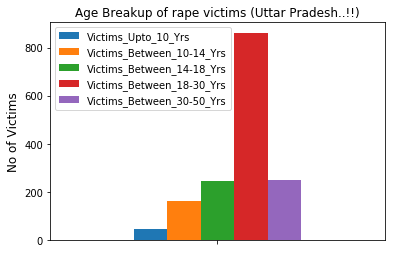

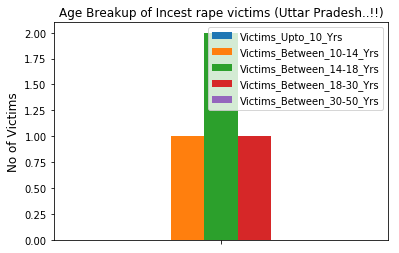

In [12]:
up_total_rape = df_victim_of_rape.loc[df_victim_of_rape['Area_Name']=='Uttar Pradesh']
up_victim_2010_total = up_total_rape [(up_total_rape['Year']==2010) & (up_total_rape['Subgroup']=='Total Rape Victims')]
up_victim_2010_total_incest_rape = up_total_rape [(up_total_rape['Year']==2010) & (up_total_rape['Subgroup']=='Victims of Incest Rape')]

#Plotting age breakup of victims
ax = up_victim_2010_total[['Victims_Upto_10_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs']].plot(kind='bar',legend=True, title = 'Age Breakup of rape victims (Uttar Pradesh..!!)')
ax.set_ylabel("No of Victims", fontsize=12)
ax.set_xticklabels([]);
ax = up_victim_2010_total_incest_rape[['Victims_Upto_10_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs']].plot(kind='bar',legend=True, title = 'Age Breakup of Incest rape victims (Uttar Pradesh..!!)')
ax.set_ylabel("No of Victims", fontsize=12)
ax.set_xticklabels([]);

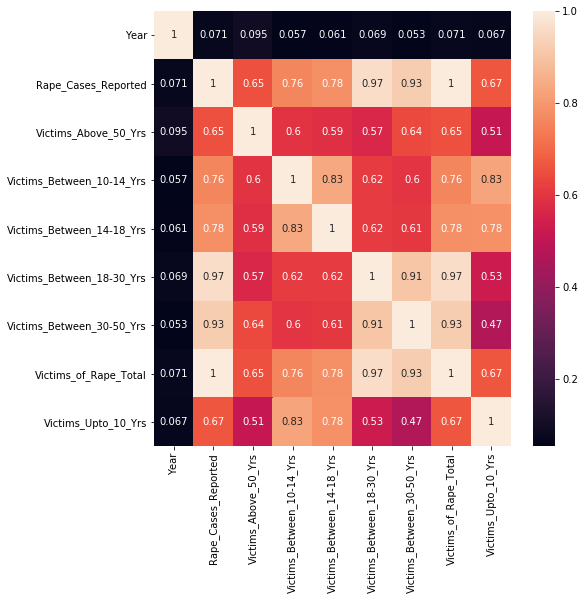

In [13]:
import seaborn as sns
plt.figure(figsize=(8,8))
df_corr=df_victim_of_rape.corr()
sns.heatmap(df_corr, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values,annot=True);

In [ ]:
Damn! 97% of the Rape Cases reported are for Victims between 18 to 30! We can see that Year is least correlated, which tells us that the Age of the Victim doesn't matters, people out there are getting more and more EVIL!

In [15]:
# What is the mean of the Total Rapes:
df_mean = df_victim_of_rape.Victims_of_Rape_Total.mean()
print(df_mean)

362.1980952380952


In [16]:
# We have seen the MEAN value, now we will try to see the states where the Total Rapes are greater than MEAN
df_total = df_victim_of_rape[df_victim_of_rape.Victims_of_Rape_Total>362]
df_total.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
30,Andhra Pradesh,2001,Total Rape Victims,871,14,138,254,328,80,871,57
32,Andhra Pradesh,2001,Victims of Other Rape,867,14,136,254,326,80,867,57
33,Andhra Pradesh,2002,Total Rape Victims,1002,8,67,35,709,148,1002,35
35,Andhra Pradesh,2002,Victims of Other Rape,997,8,65,35,706,148,997,35
36,Andhra Pradesh,2003,Total Rape Victims,946,7,135,215,429,127,946,33


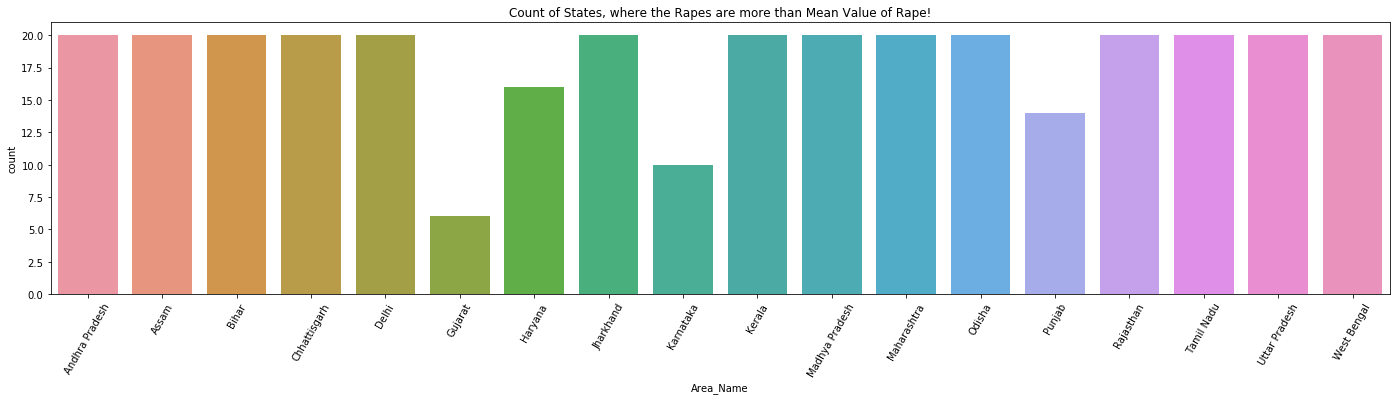

In [17]:
# Let's find out those States! where the Rapes are more than Mean!
plt.figure(figsize=(24,5))
plt.title('Count of States, where the Rapes are more than Mean Value of Rape!');
sns.countplot(df_total.Area_Name);
plt.xticks(rotation = 60);

In [18]:
# Let's explore the recieved Data Frame and perform drilling analysis on that!
data_frame_to_drill = df_total.copy()

In [19]:
data_frame_to_drill.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,2005.733129,1063.202454,5.472393,67.463190,154.208589,628.365031,180.334356,1063.929448,28.085890
std,2.870423,634.447012,6.911585,73.283413,165.483402,373.000563,154.311997,634.432717,26.971529
min,2001.000000,366.000000,0.000000,0.000000,0.000000,58.000000,6.000000,366.000000,0.000000
25%,2003.000000,573.000000,1.000000,15.000000,32.000000,346.000000,64.000000,574.000000,7.000000
50%,2006.000000,939.000000,3.000000,42.000000,86.500000,586.000000,136.000000,939.000000,22.000000
75%,2008.000000,1346.750000,7.000000,107.000000,236.000000,785.000000,230.250000,1346.750000,38.000000
max,2010.000000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


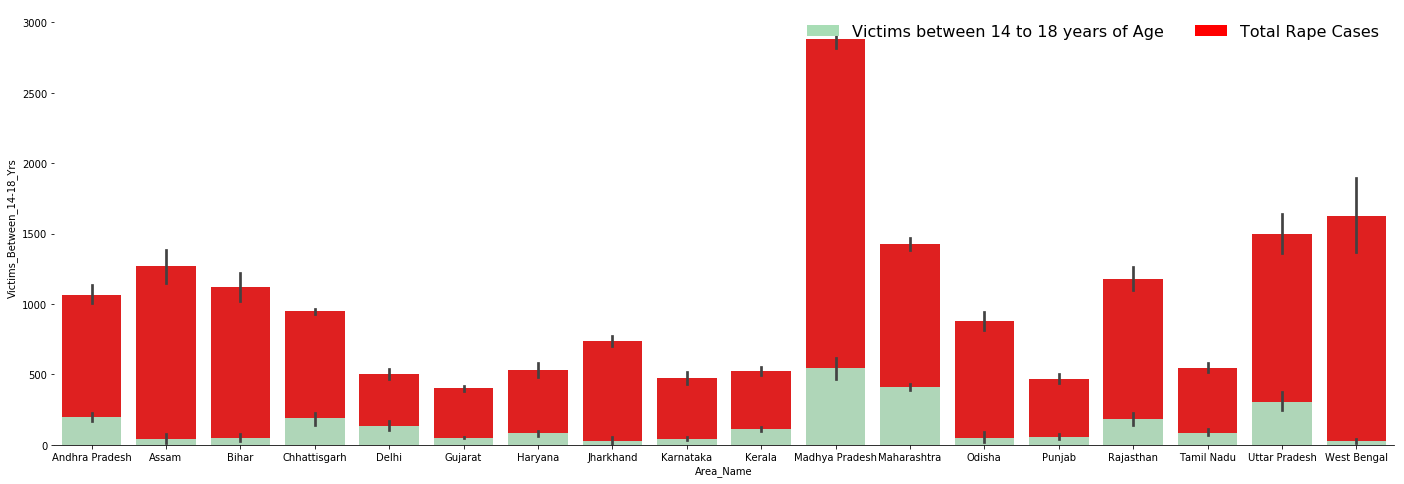

In [20]:
plt.figure(figsize=(24,8))
sns.barplot(x = data_frame_to_drill.Area_Name, y = data_frame_to_drill['Rape_Cases_Reported'], color = "red")
upto_18 = sns.barplot(x = data_frame_to_drill.Area_Name, y = data_frame_to_drill['Victims_Between_14-18_Yrs'], color = "#a8ddb5")
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
upto_18 = plt.Rectangle((0,0),1,1,fc='#a8ddb5',  edgecolor = 'none')
l = plt.legend([upto_18, topbar], ['Victims between 14 to 18 years of Age', 'Total Rape Cases'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
sns.despine(left=True)

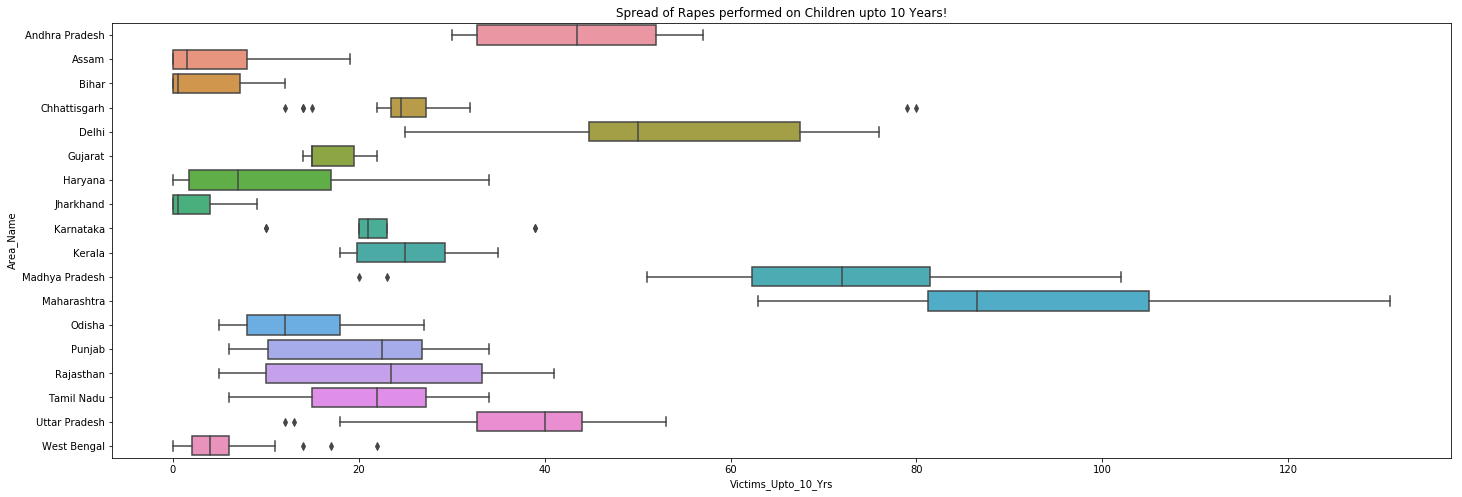

In [21]:
plt.figure(figsize=(24,8))
sns.boxplot(data_frame_to_drill.Victims_Upto_10_Yrs,data_frame_to_drill.Area_Name,data = data_frame_to_drill);
plt.title('Spread of Rapes performed on Children upto 10 Years!');

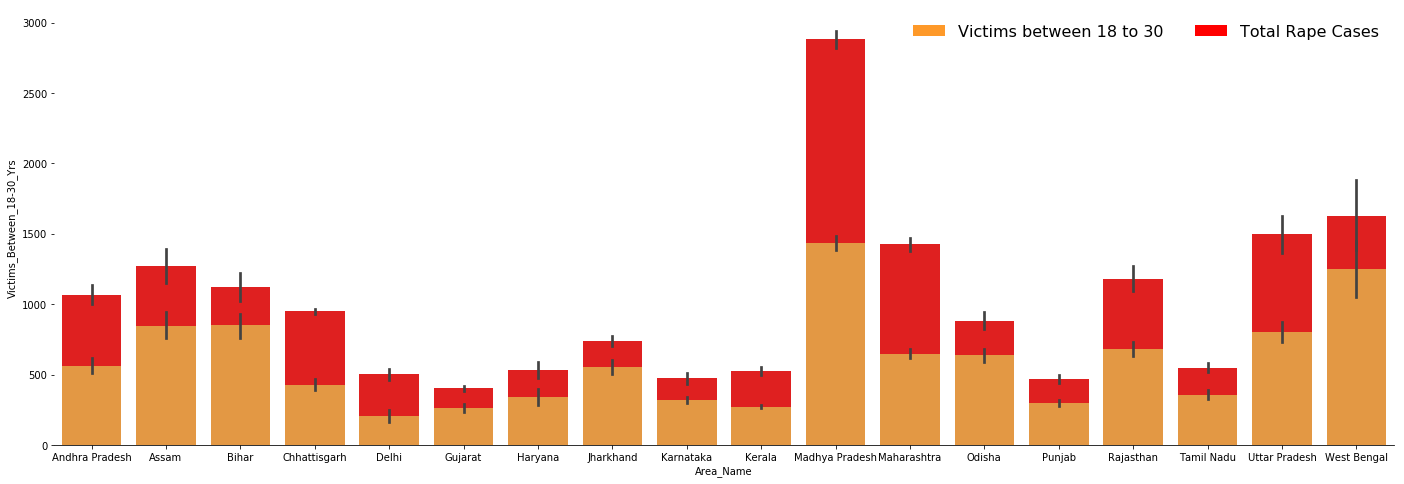

In [22]:
plt.figure(figsize=(24,8))
sns.barplot(x = data_frame_to_drill.Area_Name, y = data_frame_to_drill['Rape_Cases_Reported'], color = "red")
upto_30 = sns.barplot(x = data_frame_to_drill.Area_Name, y = data_frame_to_drill['Victims_Between_18-30_Yrs'], color = "#fe9929")
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
upto_30 = plt.Rectangle((0,0),1,1,fc='#fe9929',  edgecolor = 'none')
l = plt.legend([upto_30, topbar], ['Victims between 18 to 30', 'Total Rape Cases'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
sns.despine(left=True)
#upto_30.set_ylabel("Y-axis label");
#upto_30.set_xlabel("X-axis label");

Here,We can see that the States Madhya Pradesh and Maharashtra are in some kind of competition for this crime! Please be informed that this is not helping at all. The State Government should do something about it! The Central Government should bring some hard rules for this kind of Crimes!

It is very shocking to see Maharashtra to be leading in this kind of Crime! Anyone reading this kernel from any part of the State -- Maharashtra, this is happening in your city.

In [ ]:
Lets work on other serious fraud dataset in crime data

In [23]:
df_31s_f=pd.read_csv("C:\\Users\\HP\\Desktop\\DT\\dataset\\31_Serious_fraud.csv")

In [24]:
df_31s_f.describe()

,Year,Loss_of_Property_1_10_Crores,Loss_of_Property_10_25_Crores,Loss_of_Property_25_50_Crores,Loss_of_Property_50_100_Crores,Loss_of_Property_Above_100_Crores
count,448.000000,444.000000,386.000000,382.000000,379.000000,377.000000
mean,2005.629464,19.569820,0.450777,0.238220,0.105541,0.058355
std,2.841247,183.022608,1.890210,1.180909,0.835360,0.337056
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,2010.000000,3131.000000,23.000000,15.000000,15.000000,5.000000


In [25]:
df_31s_f.isnull().sum()

Area_Name                             0
Year                                  0
Group_Name                            0
Sub_Group_Name                        0
Loss_of_Property_1_10_Crores          4
Loss_of_Property_10_25_Crores        62
Loss_of_Property_25_50_Crores        66
Loss_of_Property_50_100_Crores       69
Loss_of_Property_Above_100_Crores    71
dtype: int64

In [26]:
df_31s_f.Loss_of_Property_1_10_Crores.mean()

19.56981981981982

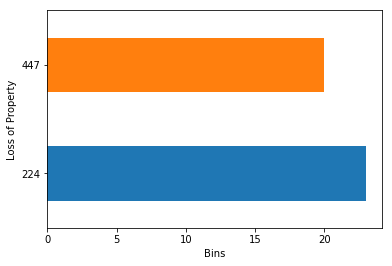

In [27]:
df_31s_f.groupby(['Area_Name','Year']).Loss_of_Property_10_25_Crores.plot(kind='barh');
plt.xlabel('Bins')
plt.ylabel('Loss of Property')
plt.show()

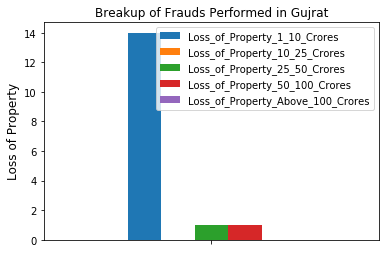

In [28]:
#1. Gujarat
df_plot_fraud = df_31s_f.loc[df_31s_f['Area_Name'] == 'Gujarat']
df_year_fraud = df_plot_fraud[(df_plot_fraud['Year'] == 2001) & (df_plot_fraud['Group_Name'] == 'Serious Fraud - Cheating')]
ax = df_year_fraud[['Loss_of_Property_1_10_Crores','Loss_of_Property_10_25_Crores','Loss_of_Property_25_50_Crores','Loss_of_Property_50_100_Crores','Loss_of_Property_Above_100_Crores']].plot(kind='bar',legend=True, title = 'Breakup of Frauds Performed in Gujrat')
ax.set_ylabel("Loss of Property", fontsize=12)
ax.set_xticklabels([]);

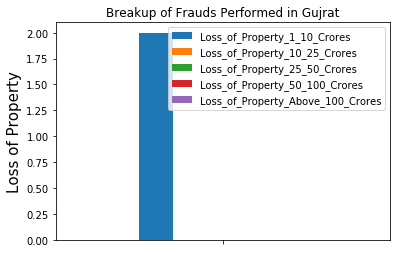

In [29]:
#2. Delhi
df_plot_fraud = df_31s_f.loc[df_31s_f['Area_Name'] == 'Delhi']
df_year_fraud = df_plot_fraud[(df_plot_fraud['Year'] == 2001) & (df_plot_fraud['Group_Name'] == 'Serious Fraud - Cheating')]
ax = df_year_fraud[['Loss_of_Property_1_10_Crores','Loss_of_Property_10_25_Crores','Loss_of_Property_25_50_Crores','Loss_of_Property_50_100_Crores','Loss_of_Property_Above_100_Crores']].plot(kind='bar',legend=True, title = 'Breakup of Frauds Performed in Gujrat')
ax.set_ylabel("Loss of Property", fontsize=15)
ax.set_xticklabels([]);

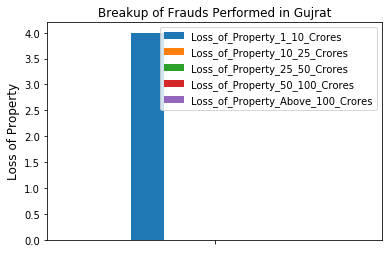

In [30]:
#3. Andhra Pradesh
df_plot_fraud = df_31s_f.loc[df_31s_f['Area_Name'] == 'Andhra Pradesh']
df_year_fraud = df_plot_fraud[(df_plot_fraud['Year'] == 2001) & (df_plot_fraud['Group_Name'] == 'Serious Fraud - Cheating')]
ax = df_year_fraud[['Loss_of_Property_1_10_Crores','Loss_of_Property_10_25_Crores','Loss_of_Property_25_50_Crores','Loss_of_Property_50_100_Crores','Loss_of_Property_Above_100_Crores']].plot(kind='bar',legend=True, title = 'Breakup of Frauds Performed in Gujrat')
ax.set_ylabel("Loss of Property", fontsize=12)
ax.set_xticklabels([]);

Here we look at the Areas where the frauds under 1 to 10 Crores are performed more than 40.0 times.!!

In [31]:
df_frauds_1_10_crores  = np.where(df_31s_f['Loss_of_Property_1_10_Crores']>40.0)
print(df_frauds_1_10_crores)
for i in df_frauds_1_10_crores:
    print(df_31s_f['Area_Name'][i])

(array([ 13,  18,  37, 118, 159, 169, 193, 206, 213, 216, 243, 262, 386,
       409, 436], dtype=int64),)
13       Karnataka
18          Punjab
37          Punjab
118      Jharkhand
159          Bihar
169    Maharashtra
193    Maharashtra
206          Delhi
213      Karnataka
216    Maharashtra
243         Punjab
262         Punjab
386        Gujarat
409          Delhi
436      Karnataka
Name: Area_Name, dtype: object


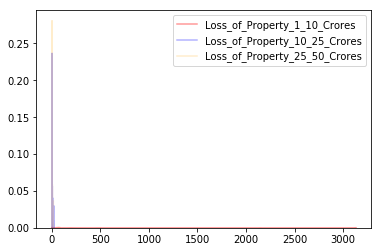

In [32]:
sns.kdeplot(df_31s_f['Loss_of_Property_1_10_Crores'],shade = True,color="red",alpha = 0.4)
sns.kdeplot(df_31s_f['Loss_of_Property_10_25_Crores'],shade = True,color="blue",alpha = 0.3)
sns.kdeplot(df_31s_f['Loss_of_Property_25_50_Crores'],shade = True,color="orange",alpha = 0.2)
plt.show();

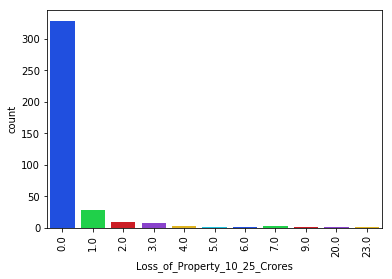

In [33]:
p = sns.countplot(x="Loss_of_Property_10_25_Crores" , data=df_31s_f , palette = "bright")
_ = plt.setp(p.get_xticklabels(),rotation = 90)